In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# this declaration enables multiple outputs from the cells in the notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h2>Topic Modeling of the Content from the 2018 Sensors Expo & Conference Program</h2>

<h3>Introduction</h3>

<i>Topic modeling</i> can be described as a "method for finding a group of words (i.e a <i>topic</i>) from a collection of documents that best represents the information in the collection. It can also be thought of as a form of text mining – a way to obtain recurring patterns of words in textual material."

In this topic modeling exercise, some of the key questions are: 

<ol>
    <li>Is there a relatively short list of topics that capture the essense of conference content?</li>
    <li>If there is a shortlist, are there differences among the sessions with respect to these topics?</li>
    <li>Similarly, are there differences among the tracks with respect to these topics?</li>
</ol>

Given that the conference is organized around tracks and sessions, you'd expect the answers to questions 2 and 3 to be 'yes.'

In the context of larger conferences, like the Sensor Expo/Conference, with multiple tracks, sessions, and presentations that are scheduled over multiple days, topic modeling can potentially provide practical assistance. Creatively applied, topic modeling could:

<ul>
<li>help organizers develop and schedule tracks and sessions with more uniform content and discover gaps in coverage.</li>
<li>assist presenters in producing abstracts and presentations/papers more in line with track and session content and, in those cases where presenters have to submit to particular tracks/sessions, assist in determine to which tracks and sessions they should apply.</li>
<li>help attendees discover and determine tracks and topics of interest, as well as assisting in putting together personalized conference schedules that meet their interests.</li>
</ul>

There are a variety of techniques for finding topics in a corpus of text. The technique we will explore is known as <i>non-negative matrix factorization (NMF)</i>. Briefly stated, NMF is based on "multivariate analysis and linear algebra where a matrix V is factorized into (usually) two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to inspect." In our case, the matrix V is an NxM document-term matrix, W is a NxP document-topic weight matrix with N documents and P topic weights for each document, and H is an PxM matrix with P topic weights for each of the M term. Together, the product of derived values for W x H reproduces the original matrix V as closely as possible.

Obviously, the starting point for this technique is the document-term matrix V. Shortly, we'll see that the basis of the rows in this matrix is a 'bag of lemmas' for each session abstract that produced at the end of the Text Analysis notebook in this projects and stored in a JSON file.


<h3><a class="anchor" id="toc">Table of Contents</a></h3>

1. [Session Abstract Lemmas: Reading the JSON file and Converting it to a Dictionary](#jsonDict)<br>
   [Structure of the Session Abstracts Dictionary](#structure sessAbstractsDict)<br>
   [Earlier Results from Text Analysis Notebook](#earlier results)<br>
   [Refining and storing the List of Lemmas](#refining lemmas)<br>
2. [Converting Raw Frequencies to TFIDF Weights](#tfidf)<br>
   [Sklearn TfidfVectorizer: Feature Extraction](#tfidfVectorizer)<br>
3. [Clustering and Visualization: Similarities and Differences among Documents](#clustering and visualization)<br>
   [Measuring Distance: Focus on Cosine Similarity](#distance)<br>
   [Heat Maps: Color coded view of Similarities](#heatmap)<br>
   [Dendrogram: Display of Hiearchical Clustering](#dendrogram)<br>
4. [Topic Modeling: Non-Negative Matrix Factorization](#nmf)<br>
   [Sklearn Decomposition with NMF](#decomposition)<br>
   [Exploring the Results of NMF](#nmf results)<br>
   [Topics and their Terms - the H Matrix](#topics and terms)<br>
   [Documents and their Topics - the W Matrix](#docs and topics)<br>
   [Visualizing Document Topic Weights: Stacked Vertical Bar Charts](#bar charts)<br>
   [Summary Results of Topic Analysis: Top 10 Lemmas and Session Titles by Topics](#summary results)<br>
   [Concluding Remarks](#concluding remarks)<br>
5. [Next Step](#next step)<br>

<a class="anchor" id="jsonDict"></a>
<h3>Session Abstract Lemmas: Reading the JSON file and Converting it to a Dictionary</h3>
* [Return to TOC](#toc)

In [3]:
import json
filePath = 'c:/users/davek/' # the name of the directory where the JSON file is stored 
dictFile = filePath + 'sessAbstractsDict.json'
with open(dictFile) as f:
   sessAbstractsLemmaDict = json.loads(f.read())

To verify that the loading and conversion has occurred, we can check the type of 'SessAbstractsLemmaDict', it's length (i.e. number of sessions in the Sensor Expo/Conference), and it's keys.

In [4]:
print('Type for sessAbstractsLemmaDict: ', type(sessAbstractsLemmaDict))
print('')
print('Number of Sessions: ', len(sessAbstractsLemmaDict))
print('')
print('Keys for the Sessions in sessAbstractsLemmaDict:')
print(list(sessAbstractsLemmaDict.keys()))

Type for sessAbstractsLemmaDict:  <class 'dict'>

Number of Sessions:  132

Keys for the Sessions in sessAbstractsLemmaDict:
['S00T00', 'S01T00', 'S02T00', 'S03T00', 'S04T00', 'S06T00', 'S00T01', 'S00T02', 'S01T02', 'S02T02', 'S03T02', 'S04T02', 'S05T02', 'S00T03', 'S01T03', 'S02T03', 'S03T03', 'S04T03', 'S05T03', 'S00T04', 'S01T04', 'S02T04', 'S03T04', 'S04T04', 'S05T04', 'S06T04', 'S07T04', 'S08T04', 'S09T04', 'S00T05', 'S01T05', 'S02T05', 'S03T05', 'S04T05', 'S00T06', 'S00T07', 'S01T07', 'S02T07', 'S03T07', 'S04T07', 'S05T07', 'S06T07', 'S07T07', 'S08T07', 'S09T07', 'S10T07', 'S11T07', 'S12T07', 'S13T07', 'S14T07', 'S00T08', 'S01T08', 'S02T08', 'S03T08', 'S04T08', 'S00T09', 'S01T09', 'S02T09', 'S03T09', 'S04T09', 'S05T09', 'S06T09', 'S07T09', 'S08T09', 'S09T09', 'S10T09', 'S11T09', 'S12T09', 'S13T09', 'S14T09', 'S15T09', 'S16T09', 'S17T09', 'S18T09', 'S19T09', 'S20T09', 'S21T09', 'S22T09', 'S23T09', 'S24T09', 'S25T09', 'S26T09', 'S27T09', 'S28T09', 'S29T09', 'S30T09', 'S31T09', 'S32

<a class="anchor" id="structure sessAbstractsDict"></a>
<h3>Structure of the Session Abstracts Dictionary</h3>
* [Return to TOC](#toc)

There were 132 sessions in the conference program and subsequently 132 abstracts. In this analysis each session has an ID or key whose format is 'SnnTmm' where 'nn' is the number of the session within a track and 'mm' is the number of the track. In both cases the numbers are <i>0-based</i>. So, for instance, 'S00T00' is the first session within the first track, while the last session 'S28T12' is the 29th session in the 13th track. \[Note: One of the session abstracts, 'S00T05', was eliminated because it was a perfunctionary summary session of the previous day's events\]. 

Within this dictionary each session is itself a dictionary' with two keys -- 'sessLemmas' and 'sessLemmaBOW'.  A print of the types for each element, shows that 'sessLemmas' is a 'list', while 'sessLemmaBOW' is a dictionary. A sample of the their respective contents is shown for session 'S00T00'. As the sample indicates, 'sessLemmas' is a simple listing of the lemmas in the order in which they appear in the abstract. In contrast 'sessLemmaBOW' is a 'bag of lemmas' indicating the frequency with which the individual lemmas occur in the abstract. So, for instance, in the abstract for session 'S00T00' the lemma 'complimentary' appears once and the lemma 'mplab' appears 3 times.

In [5]:
print('sessAbstractsLemmaDict Keys: ', sessAbstractsLemmaDict['S00T00'].keys())
print('Type for type sessLemmas: ', type(sessAbstractsLemmaDict['S00T00']['sessLemmas']))
print('Type for type sessLemmaBOW: ', type(sessAbstractsLemmaDict['S00T00']['sessLemmaBOW']))
print('')
print('Example sessLemmas for S00T00:')
print(sessAbstractsLemmaDict['S00T00']['sessLemmas'])
print('')
print('Example sessLemmaBOW for S00T00:')
print(sessAbstractsLemmaDict['S00T00']['sessLemmaBOW'])

sessAbstractsLemmaDict Keys:  dict_keys(['sessLemmas', 'sessLemmaBOW'])
Type for type sessLemmas:  <class 'list'>
Type for type sessLemmaBOW:  <class 'dict'>

Example sessLemmas for S00T00:
['complimentary', 'mplab', 'xpress', 'eval', 'board', 'attendees', 'learn', 'develop', 'embedded', 'sensor', 'node', 'prototype', 'capture', 'humidity', 'temperature', 'pressure', 'data', 'speed', 'configuration', 'microchip', 'microcontroller', 'bosch', 'bme280sensor', 'use', 'mplab', 'code', 'configurator', 'mcc', 'graphical', 'programming', 'interface', 'tool', 'generate', 'free', 'library', 'simple', 'apis', 'attendee', 'spend', 'time', 'work', 'solution', 'instead', 'mess', 'register', 'communication', 'protocol', 'attendee', 'need', 'install', 'tool', 'computer', 'entire', 'workshop', 'use', 'cloud', 'base', 'mplab', 'xpress', 'ide', 'sensor', 'data', 'graph', 'computer', 'via', 'on-board', 'usb-to-serial', 'adapter', 'attendee', 'show', 'move', 'solution', 'wireless', 'communication', 'method

<a class="anchor" id="earlier results"></a>
<h3>Earlier Results from Text Analysis Notebook</h3>
* [Return to TOC](#toc)

To reiterate earlier results, the text analysis in the preceeding notebook revealed that:

<ol> 
    <li><i>Substantial Lexical Diversity</i>: The total number of lemmas in the corpus of (all) abstracts was 6470, while the number of unique lemmas (aka the vocabulary) was 2107.  That's a ratio of ~3 to 1 which means that on average each lemma was only used 3 times. Basically, the implication is that on the average there is minimal overlap from one document to the next.</li><br>
    <li><i>Substantial % of the Corpus covered by a Small Collection of Lemmas</i>:  For example, the 200 most frequent lemmas, which is about 10% of the vocabulary, account for a little under 50% of the total lemmas used in the corpus. The implication is that we can potentially use a small set of lemmas to make distinctions among the documents and topics.</li><br>
    <li><i>Substantial % of the Vocabulary accounts for small % of the Corpus</i>: In the session abstracts, close to 60% of the lemmas occur only once (these are known as <i>hapax legomenon</i>). Together, they only account for 18% (=1171/6470) of the corpus. Similarly, if you combine all the lemmas that occur 3 times or less, the figures are 83% and 26%, respectively. In general, these infrequent lemmas are of minor utility in distinguishing the content of one session abstract from another.</li>
</ol>

Taken together, the overall implication is that we can simplify the task of creating a document-term matrix by focusing on those terms that occur most frequently. Below is a list of the 245 most frequent lemmas in the corpus of session abstracts. 245 may seem a bit random, but it actually covers all those lemmas that occur 6 times or more in the corpus. These 245 lemmas will serve as the starting for contructing the document-term matrix.

In [6]:
import nltk
from nltk import FreqDist

totLemmas = []
for key in list(sessAbstractsLemmaDict.keys()):
    totLemmas = totLemmas + sessAbstractsLemmaDict[key]['sessLemmas']
fDistLemmas = FreqDist(totLemmas)
topLemmas = fDistLemmas.most_common(245)
print('List of Top Lemmas - those occurring 6 times or more:')
print('')
print(topLemmas)

List of Top Lemmas - those occurring 6 times or more:

[('sensor', 157), ('iot', 88), ('application', 77), ('session', 77), ('technology', 69), ('use', 67), ('system', 57), ('data', 46), ('solution', 46), ('provide', 44), ('device', 39), ('new', 35), ('power', 35), ('learn', 34), ('network', 33), ('include', 31), ('industrial', 30), ('need', 29), ('industry', 29), ('market', 28), ('make', 28), ('smart', 28), ('sense', 26), ('development', 26), ('enable', 25), ('develop', 24), ('environment', 22), ('also', 21), ('challenge', 21), ('security', 21), ('process', 21), ('attendee', 20), ('many', 19), ('discuss', 19), ('connectivity', 19), ('control', 18), ('design', 17), ('connect', 16), ('business', 16), ('battery', 16), ('available', 16), ('technique', 16), ('potential', 16), ('create', 16), ('platform', 16), ('embed', 15), ('source', 15), ('energy', 15), ('automotive', 15), ('gas', 15), ('work', 14), ('world', 14), ('address', 14), ('well', 14), ('life', 14), ('case', 14), ('presentation'

<a class="anchor" id="refining lemmas"></a>
<h3>Refining and storing the List of Lemmas</h3>
* [Return to TOC](#toc)

In looking at this list of 245 lemmas, there are still a number of terms that:

<ul>
    <li>are similar to stop words that have little to do with the world of sensors (e.g. use, many, best, etc.)</li>
    <li>refer primarily to the operation of the conference or the structure of the presentations not the topical or thematic content of the conference (e.g. session, discuss, presentation, attendee, overview, etc.)</li> 
</ul>

Additionally, the word 'sensor' appears in over half the abstracts. Because of this, it's not likely to play a major role in distinguishing one abstract from the next. For these reasons, the lemmas in the above categories, as well as the lemma 'sensor' have been (manually) eliminated from the list of 'top' lemmas. The final result, shown below, contains 193 lemmas. This is the list that will be used in constructing the document-term matrix.

In [7]:
topLemmas = ['iot','application','technology','system','data','solution','device','power','learn','network','industrial','industry','market','make','smart','development','develop','environment','challenge','security','process','connectivity','control','design','connect','business','battery','technique','potential','create','platform','embed','source','energy','automotive','gas','work','world','address','life','case','small','amazon','freertos','software','time','cloud','future','internet','requirement','research','analytics','machine','high','build','require','thing','low','communication','wireless','wearable','vehicle','wide','key','look','today','service','cost','company','base','ai','capability','understand','innovative','recent','current','performance','food','code','generate','autonomous','advance','approach','edge','support','type','consumer','safety','optical','measurement','monitor','area','growth','range','analysis','solar','end','change','intelligent','year','lidar','start','city','reduce','decision','block','different','trust','exist','camera','review','monitoring','focus','size','flexible','run','air','light','board','pressure','tool','information','opportunity','ecosystem','open','variety','health','deployment','iiot','manufacture','integration','critical','impact','level','electronics','product','vision','compute','share','combine','integrate','modern','reach','functional','increase','feature','root','standard','signal','innovation','building','remote','fast','highlight','bluetooth','model','field','lpwan','speed','robot','human','flexibility','explore','mission','state','multiple','trend','mem','component','position','gain','functionality','operation','community','traditional','engineering','organization','important','achieve','fabric','commercial','issue','advanced','operate','user','drive','mobile','rtos','maintenance','developer','quality','global','intel']
print(len(sessAbstractsLemmaDict),'abstracts X', len(topLemmas), 'lemmas =',len(sessAbstractsLemmaDict)*len(topLemmas),'cells' )

132 abstracts X 193 lemmas = 25476 cells


Based on this adjustment, the document-term matrix (yet to be constructed) will contain 132 rows (one for each abstract), 193 columns (one for each of the most frequent lemmas), and 25476  cells. Initially, each cell of the matrix will contain a frequency equal to the number of times that the associated lemma appears in the designated abstract.

As a next step in the process, we'll create and store the lemma counts with each session in the sessAbstractsDict. They will be stored in an 'ordered dictionary' which is a type of Python <i>collection</i> that return keys in the order in which they were created. Here, the order we want to preserve is the rank ordering of the lemma frequencies from the most to the least frequent.  This is primarily for display purposes because the NMF topic modeler will eventually rearrange them in alphabetical order.

In [8]:
from collections import OrderedDict
import copy

# now create a 'dummy' ordered dictionary with the top lemmas as keys and the counts set at 0
# 0 is used as the default because in a given abstract most of the top lemmas will not appear.
# In fact the average number of lemmas per abstract is ~50 including all lemmas (top ranked or not).

orderedLemmaDict = OrderedDict((lemma, 0) for lemma in topLemmas)
#print(orderedLemmaDict)

# we make a copy of the orderVector so we don't overwrite the template dictionary of ordered Lemmas
for sessKey in list(sessAbstractsLemmaDict.keys()):
    orderedVec = copy.copy(orderedLemmaDict)
    orderedTotLemma= 0
    for lemma in list(sessAbstractsLemmaDict[sessKey]['sessLemmaBOW'].keys()):
        if lemma in topLemmas:
            orderedVec[lemma] = sessAbstractsLemmaDict[sessKey]['sessLemmaBOW'][lemma]
            orderedTotLemma += orderedVec[lemma]
    sessAbstractsLemmaDict[sessKey]['sessLemmaRow'] = orderedVec

# sample sessLemma Rowprint
sessKey = 'S00T00'
lemmasForSessKey = sessAbstractsLemmaDict[sessKey]['sessLemmaRow']
print('Top lemma counts for sample session', sessKey)
print('There are', len(lemmasForSessKey), 'lemmas for every session.')
print('')
print(lemmasForSessKey)

Top lemma counts for sample session S00T00
There are 193 lemmas for every session.

OrderedDict([('iot', 1), ('application', 0), ('technology', 0), ('system', 0), ('data', 2), ('solution', 3), ('device', 0), ('power', 0), ('learn', 1), ('network', 0), ('industrial', 0), ('industry', 0), ('market', 0), ('make', 0), ('smart', 0), ('development', 0), ('develop', 1), ('environment', 0), ('challenge', 0), ('security', 0), ('process', 0), ('connectivity', 0), ('control', 0), ('design', 0), ('connect', 0), ('business', 0), ('battery', 0), ('technique', 0), ('potential', 0), ('create', 0), ('platform', 0), ('embed', 0), ('source', 0), ('energy', 0), ('automotive', 0), ('gas', 0), ('work', 1), ('world', 0), ('address', 0), ('life', 0), ('case', 0), ('small', 0), ('amazon', 0), ('freertos', 0), ('software', 0), ('time', 1), ('cloud', 1), ('future', 0), ('internet', 0), ('requirement', 0), ('research', 0), ('analytics', 0), ('machine', 0), ('high', 0), ('build', 0), ('require', 0), ('thing', 0), 

<a class="anchor" id="tfidf"></a>
<h3>Converting Raw Frequencies to TFIDF Weights</h3>
* [Return to TOC](#toc)


In its current form, there are essentially two problems with using the 'sessLemmaRow's to make comparisons among the session abstracts:

<ol>
    <li><i>Term Frequency (TF)</i>: Longer documents will have higher average counts than shorter documents. Yet, these documents may be talking about the same basic topics. At a minimum, the frequencies of the terms within a document ought to be normalized (e.g. dividing by the total number of terms in the document), so we're comparing proportions or percentages not raw frequences.</li>
    <li><i>Inverse Document Frequency (IDF)</i>: Some words in the corpus may appear quite often and, as a consequence, are less informative than those that occur less frequently. Knowing, for example, that an abstract contains the word 'sensor' doesn't help us distinguish one abstract from another because most abstracts contain the lemma 'sensor' (remember this is a conference about sensors so the word is everywhere). That's why it was eliminated from consideration. The same may be true for other frequent lemmas like 'technology' or 'data', although they occur much less frequently than 'sensor' does.</li>
</ol>

To handle these two problems, each of the 'raw' frequencies is typically converted to a weighted value known as the <i>term frequency-inverse document frequency (tfidf)</i>. As the name of the weight implies, there are two parts to the conversion. The first part 'term frequency (tf)' handles the first problem, while the second part 'inverse document frequency (idf)' handles the second problem. These values are multiplied to produce the final weight (tfidf):

<ul>
    <li>tf = freq of term in doc / number of words in doc</li>
    <li>idf = total number of docs in corpus / number of docs where the term appears</li>
    <li>tf-idf = tf x idf where</li>
</ul>

For instance, the td-idf's for the lemmas 'data' and 'solution' in session 'S00T00' are .38 and 1.57, respectively. Yet, they both occur 2 times in that session (which has 25 lemmas total). The difference is that the lemma 'data' appears 29 times in the corpus, while the lemma 'solution' occurs 7 times. The former lemma ('data') is not as unique, so its frequency is dampened accordingly.

In [9]:
def tfidf(sessKey, lemma, lemDict):
    freqInDoc = lemDict[sessKey]['sessLemmaBOW'][lemma]
    wordsInDoc = 0
    lemmaRow = lemDict[sessKey]['sessLemmaRow']
    for lem, freq in lemmaRow.items():
        if freq > 0: wordsInDoc += freq
    numDocs = len(sessAbstractsLemmaDict)
    numDocsWithTerm = 0
    for sKey in list(lemDict.keys()):
        lemmaRow = lemDict[sKey]['sessLemmaRow']
        if lemmaRow[lemma]: numDocsWithTerm += 1
    tfidf = round((freqInDoc/wordsInDoc)*(numDocs/numDocsWithTerm),2)
    print('lemma:', lemma, 'tfidf', tfidf, '-- fd:', freqInDoc, 'wd:', wordsInDoc, 'nd:', numDocs, 'ndt:', numDocsWithTerm)
    return tfidf

weightFreq = tfidf('S00T00', 'data', sessAbstractsLemmaDict)
weightFreq = tfidf('S00T00', 'communication', sessAbstractsLemmaDict)

lemma: data tfidf 0.38 -- fd: 2 wd: 24 nd: 132 ndt: 29
lemma: communication tfidf 1.57 -- fd: 2 wd: 24 nd: 132 ndt: 7


<a class="anchor" id="tfidfVectorizer"></a>
<h4>Sklearn TfidfVectorizer: Feature Extraction</h4>
* [Return to TOC](#toc)

Obviously, we could develop a simple function to transform the raw frequences for every lemma in every 'sessLemmaRow' in the dictionary, just as we did above. However, the sklearn library provides a <i>tfidf vectorizer</i> that converts a corpus of documents (that can be represented in a variety of ways) into a matrix of tfidf weights. In comparison to the standard definition, this vectorizer uses a slightly different formula for idf, using the log of the original idf ratio:

<ul>
    <li>tf = freq of term in doc / number of words in doc</li>
    <li>idf = log(total number of docs in corpus / (number of docs where the term appears + 1))</li>
    <li> tfidf = tf * idf</li>
</ul>

In order to use the capabilities offered by the tfidf tokenizer, we first have to convert each sessLemmaRow into a list of lemmas and then combine all of them into a single list. This is then fed to the vectorizer which computes the tfidf weights.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# convert sessLemmaRows to list representation
documents = []
for sessKey in list(sessAbstractsLemmaDict.keys()):
    newDoc = []
    for k, v in sessAbstractsLemmaDict[sessKey]['sessLemmaRow'].items():
        if v > 0:
            for i in range(0,v):
                newDoc = newDoc + [k]
    documents.append(newDoc)
    
print('List representation of the first 2 rows of sessLemmaRow:')
print('')
print(documents[0])
print('')
print(documents[1])

List representation of the first 2 rows of sessLemmaRow:

['iot', 'data', 'data', 'solution', 'solution', 'solution', 'learn', 'develop', 'work', 'time', 'cloud', 'communication', 'communication', 'wireless', 'wearable', 'base', 'code', 'generate', 'board', 'pressure', 'tool', 'tool', 'tool', 'speed']

['application', 'application', 'technology', 'technology', 'system', 'development', 'development', 'embed', 'world', 'future', 'vehicle', 'wide', 'key', 'ai', 'capability', 'understand', 'autonomous', 'advance', 'range', 'analysis', 'information', 'vision', 'vision', 'compute', 'share', 'robot', 'human']


The sklearn <i>TfidfVectorizer</i> is part of the sklearn feature extraction module. As the official documentation notes, "Feature extraction is very different from Feature selection: the former consists in transforming arbitrary data, such as text or images, into numerical features usable for machine learning. The latter is a machine learning technique applied on these features." Here, we're transforming the list of lemma lists we just created (i.e. 'documents') into a matrix of numerical tfidf weights. 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

tfidf = TfidfVectorizer(tokenizer=lambda i:i, lowercase=False)
sparseV = tfidf.fit_transform(documents)

print('Structure of sparseV matrix of TDIDF weights')
sparseV
print('')

vMat = sparseV.toarray()
print('TFIDF Weights for 1st 3 docs (rows) and 1st 20 lemmas (columns) in vMat.')
vMat[0:3,0:20]

vocab = np.array(tfidf.get_feature_names())
print ('Lemmas for 1st 20 elements in "vocab" array:')
print('')
print(vocab[0:20])



Structure of sparseV matrix of TDIDF weights


<132x193 sparse matrix of type '<class 'numpy.float64'>'
	with 1813 stored elements in Compressed Sparse Row format>


TFIDF Weights for 1st 3 docs (rows) and 1st 20 lemmas (columns) in vMat.


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.1650332 ,
        0.        , 0.        , 0.        , 0.20229114, 0.        ],
       [0.        , 0.        , 0.18453082, 0.        , 0.18994986,
        0.        , 0.        , 0.19600784, 0.        , 0.19946947,
        0.        , 0.        , 0.        , 0.18994986, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

Lemmas for 1st 20 elements in "vocab" array:

['achieve' 'address' 'advance' 'advanced' 'ai' 'air' 'amazon' 'analysis'
 'analytics' 'application' 'approach' 'area' 'automotive' 'autonomous'
 'base' 'battery' 'block' 'bluetooth' 'board' 'build']


As shown above, the numerical result of this feature 'extraction' or transformation is stored as a sparse NxM matrix of weights where 'N' is the number of documents (132) and 'M' is the number of terms (193). In this case the sparse matrix only contains 2000 elements. That's 8% of the total 25476 possible elements. The reason for doing this is obvious. As the above listing exemplifies, the vast majority of the frequencies (and thus the tfidfs) are 0.0. The sparsity is even larger for corpuses that have larger numbers of documents and terms.

Technically speaking, the sparse matrix is an numpy float64 array. If you wish to display or use the non-sparse version, this is easily accomplished with the 'toArray' method (see the statement: vMat = sparseV.toArray()). Regardless of their form (sparse or non-sparse), all numpy arrays are devoid of text labels. In this analysis, it's easy to fetch the row labels since the rows represent the underlying session abstracts and are tied to the order of the session abstract keys. So, for example, row 0 is the first session 'S00T00', row 1 is 'S01T00', and so on. It's also fairly simple to derive the labels for the array columns which represent the lemmas. However, in this instance the order of the lemmas bears no direct relation to the original rank order of the lemmas used in the input.  Instead, the TfidfVectorizer places the terms in a python dictionary called 'tfidf.vocabulary_' whose keys are the lemmas in alphabetic order. There are two ways to retrieve this vocabulary. The simplest way is to use the <i>tfidf.get_feature_names()</i> method which is what is done above.

<a class="anchor" id="clustering and visualization"></a>
<h3>Clustering and Visualization: Similarities and Differences among Documents</h3>
* [Return to TOC](#toc)

A simple way to get a sense of the similarities and differences in content among the different session abstracts is to perform clustering analysis using the tfidf document-term matrix as input. Many of these clustering algorithms (e.g. hierarchical and non-hierarchical) rely on some form of "distance" measure between the pairs of documents in the tfidf matrix. In this case the tfidf weights for a single document represent values in an n-dimensional space. The distance between any given document and another indicates how similar or dissimilar the documents are. Those documents or vectors that are close to one another share the same words with the same weighted frequencies. The distances among all the pairs of documents in the document-term matrix provide a base for grouping documents into clusters.

<a class="anchor" id="distance"></a>
<h4>Measuring Distance: Focus on Cosine Similarity</h4>
* [Return to TOC](#toc)

A wide variety of distance measures are used for this purpose. Some examples include:

<ul>
    <li><i>Euclidean Distance</i> - This is the straight line distance between two points (p,q) in Euclidean n-space. Mathematically, it's the square root of the sum of the squared differences between corresponding elements for each point. While the lower limit of a Euclidean distance between two vectors is 0 (when the pairwise elements are equal), it's difficult to judge the relative distances of other unequal pairs because there is no pre-defined upper limit to the distance.</li><br>
    <li><i>Cosine Similarity</i> - Cosine of the angle between two vectors in n-dimensional space. Mathematically, it's the dot product of the two vectors divided by the product of the square root of the sum of squared elements for each vector. When all the elements in a matrix are positive (as they are in a tfidf matrix), then cosine similarity ranges from 0 to 1. At 0 the cosine between the two vectors is 90 degrees, meaning they are perpendicular to one another and loosely speaking completely 'dissimilar'. At 1, the cosine is 0 degrees, meaning the two vectors are equal and loosely speaking completely 'similar'.</li><br>
    <li><i>Pearson Correlation Coefficient</i> - Also known as (Pearson's) r, is a measure of the strength and direction of the linear relationship between two variables. Mathematically, it's the covariance of the variables divided by the product of their standard deviations. The value of r ranges from -1 to 0 to +1 where a value of 0 means the vectors are uncorrelated and a value of 1 means they are completely correlated. Because this is a measure for linear relationships, the direction of the correlation indicates whether the relationship is negative (high values with low values and vice-versa) or positive (lows with lows and highs with highs). An issue with r is that there are situations where it can be 'undefined' because one or both of the standard deviations in the denominator of the equation is 0.</i></li><br>
    <li><i>Manhattan Distance</i> - Name taken from "taxicab" distance between two points in Manhattan (NY). Mathematically, it's the sum of the absolute value of the distance between corresponding elements in each vector. Again, the lower limit of the measure is 0 (meaning the vectors are equal), while there is no pre-define upper limit.</i></li>
</ul>

In the following discussion we'll focus on cosine similarity, largely because it's easy to interpret and easily calculated (i.e. the sklearn library provides a method with the same name, although 2 of the others are also supported by the same libraries and modules).  The calculation of the cosine similarity for each pair of documents in our document-term matrix vMat is provided below:

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

print('First 10 Rows and Columns of Cosine Similarity for vMat:')
cosSimMat = cosine_similarity(vMat)
print(np.round(cosSimMat[0:10,0:10],2))

First 10 Rows and Columns of Cosine Similarity for vMat:
[[1.   0.   0.02 0.12 0.02 0.17 0.1  0.09 0.04 0.1 ]
 [0.   1.   0.   0.07 0.05 0.09 0.18 0.07 0.13 0.14]
 [0.02 0.   1.   0.03 0.   0.04 0.06 0.   0.   0.04]
 [0.12 0.07 0.03 1.   0.02 0.22 0.04 0.11 0.02 0.14]
 [0.02 0.05 0.   0.02 1.   0.02 0.05 0.1  0.   0.17]
 [0.17 0.09 0.04 0.22 0.02 1.   0.24 0.   0.15 0.23]
 [0.1  0.18 0.06 0.04 0.05 0.24 1.   0.04 0.18 0.13]
 [0.09 0.07 0.   0.11 0.1  0.   0.04 1.   0.06 0.14]
 [0.04 0.13 0.   0.02 0.   0.15 0.18 0.06 1.   0.  ]
 [0.1  0.14 0.04 0.14 0.17 0.23 0.13 0.14 0.   1.  ]]


The above display contains part of the similarity matrix created from pairwise comparisons of the 132 tfidf document vectors in vMat. Looking at this small sample of the comparisons for the first 10 documents, it's obvious that most of the similarities among these pairs are low (at or below ~.20). The only similarities substantially above ~.20 are those created by comparing the documents with themselves (the diagonals of 1.0)

<a class="anchor" id="heatmap"></a>
<h4>Heat Maps: Color coded view of Similarities</h4>
* [Return to TOC](#toc)

Heatmap of Cosine Similarities among Lemmas in first 10 Session Abstracts


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d95085f828>)

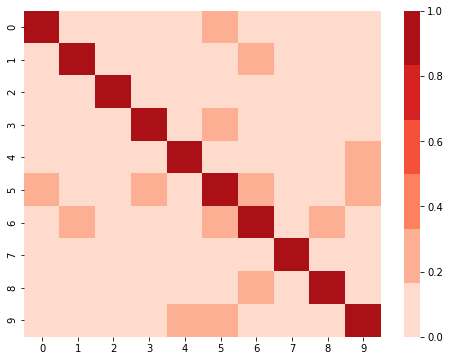

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

print('Heatmap of Cosine Similarities among Lemmas in first 10 Session Abstracts')
plt.subplots(figsize=(8,6))
cmap = sns.color_palette("Reds")
sns.heatmap(cosSimMat[0:10,0:10],cmap=cmap)

As the Heatmap for the similarities among all 132 documents shows, the above pattern is not an abberation. Again, the vast majority of similarities appear to be below .2.  

Heatmap of Cosine Similarities among 132 Session Abstracts:


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d9509f3048>)

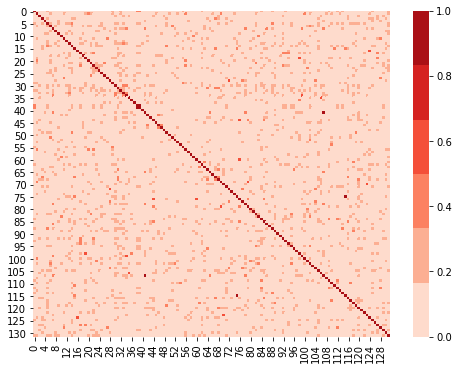

In [14]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

print('Heatmap of Cosine Similarities among 132 Session Abstracts:')
plt.subplots(figsize=(8,6))
cmap = sns.color_palette("Reds")
sns.heatmap(cosSimMat,cmap=cmap)

The actual counts (see below) are: 

<ul>
    <li>8089(~94%) below .2</li>
    <li>508(~6%) between .2 and .4</li>
    <li>47(less than 1%) above .4</li>
</ul>

This skewed is not unexpected because, as the last notebook showed, the vast majority of lemmas occur 3 times or less in the corpus. The implication is that most session abstracts are highly populated by unique collections of lemmas. It also raises questions about the viability of searching for clusters among these disparate abstracts.

In [15]:
# frequency distribution of cosine similarities
cosSimList = []
cosSimBins = [0,0,0,0,0]
for i in range(0,132):
    for j in range(i + 1, 132):
        cosSim = cosSimMat[i,j]
        cosSimList = cosSimList + [cosSim]
        if cosSim < .2: cosSimBins[0] += 1
        elif cosSim >= .2 and cosSim < .4: cosSimBins[1] += 1
        elif cosSim >= .4 and cosSim < .6: cosSimBins[2] += 1
        elif cosSim >= .6 and cosSim < .8: cosSimBins[3] += 1
        elif cosSim >= .8 and cosSim <= 1.0: cosSimBins[4] += 1
            
print('Distribution of Cosine Similarity Values for all Pairs of Documents:')
print(cosSimBins)
print(' <.2',' <.4','<.6','<.8','1.0')

Distribution of Cosine Similarity Values for all Pairs of Documents:
[8089, 508, 46, 0, 1]
 <.2  <.4 <.6 <.8 1.0


<a class="anchor" id="dendrogram"></a>
<h4>Dendrogram: Display of Hiearchical Clustering</h4>
* [Return to TOC](#toc)

One way to get a visual image of the possible clusters among a set of vectors is to construct a dendogram. "A dendrogram is a tree diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering."

The dendrogram shown below is based on hierarchical clustering where 'distance' is measured by cosine similarity and the vectors are not compared directly with one another but with the <i>centroids</i> (i.e. vector average) of the resulting clusters. Without going into excruciating details, the colors in this dendrogram provide a visual hint that there may be viable clusters of session abstracts based on the distances or similarities of their tfidf (lemma) weights. The colors also indicate that a reasonable number of clusters might be 5 (one for each of the 5 colors).

For those who are more interested in more details about dendrograms and the underlying clustering methods, there are any number of articles or tutorials on the subject. To get a listing just search 'sklearn hierarchical clustering dendrogram' on google.

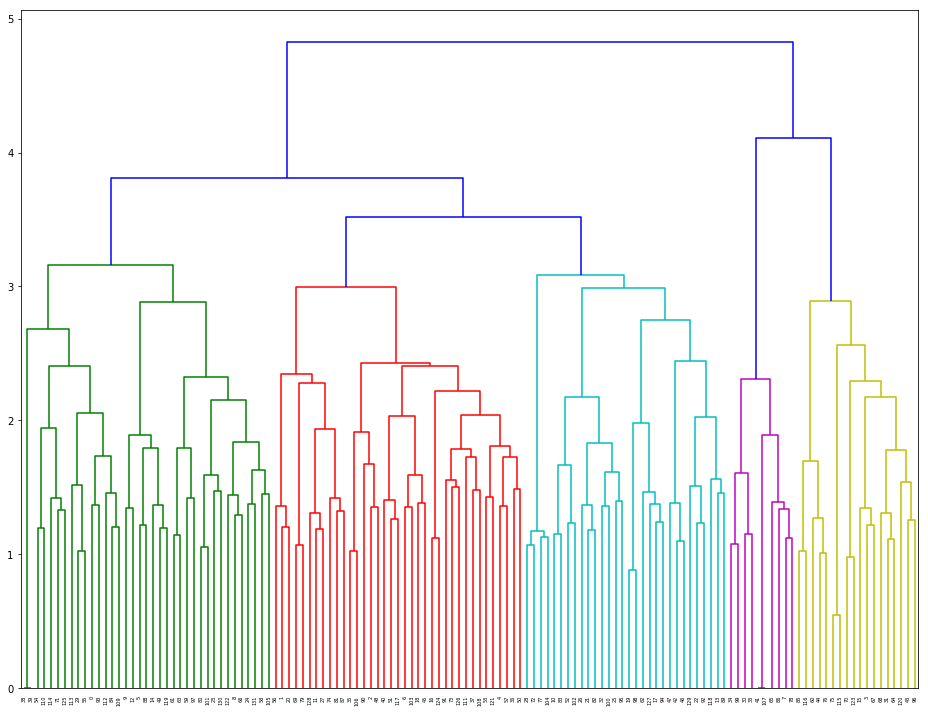

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram, linkage

linkage_matrix = ward(cosSimMat)
fig, ax = plt.subplots(figsize=(13,10))
ax = dendrogram(linkage_matrix, orientation='top')
plt.tight_layout()
plt.show()

<a class="anchor" id="nmf"></a>
<h3>Topic Modeling: Non-Negative Matrix Factorization (NMF)</h3>
* [Return to TOC](#toc)

The next step in this analysis is <i>topic modeling</i>. It provides one way of better understanding the constellation of terms/lemmas underlying the clustering of the sessions and lemmas (although the underlying math topic modeling is different than the hierarchical clustering used with the dendrogram).

As noted at the beginning, the type of topic modeling we're using is called <i>non-negative matrix factorization</i> (NMF). Simply put, it takes an NxM document-term matrix V of 'tfidf' weights and factors it into 2 non-negative matrices W and H whose product approximates the tfidf weights in V. W is an NxP document-topic matrix of weights where P is the number of topics and the weights in a given row represent the strengths of association between a single document and each topic. Documents with similar weight profiles in W (theoretically) have similar content. On the other hand, H is a PxM topic-term matrix of weights where the weights in a given row represent the strengths of association between a given topic and each term. Taken together the strongest weights in a row form a cluster or subgroup of terms that the topic encompasses. The general hope is that there will be minimal overlap between the subgroup of terms from one topic to the next.

Once you have the document-term matrix (which in this case is the session_abstract-lemma matrix labeled 'vMat'), the easy part of topic modeling is actually deriving the matrices W and H.  The hard part is deciphering the results from the two matrices.

<a class="anchor" id="decomposition"></a>
<h4>Sklearn Decomposition with NMF</h4>
* [Return to TOC](#toc)

To create the model, we employ the NMF module from the 'decomposition' library within sklearn. In order to calculate the model we not only need vMat, but we also need to designate 'n_Components' which is the number topics that will be used to represent the corpus content. For the remainder of the discussion will set the value at 5 which matches the number of clusters from the 'dendrogram.' For us, we might designate 4, 5 or 6 because these were the number of clusters displayed at key points of the dendrogram. Also, in the computations below, we'll take on faith that the 'init' value is 'nndsvid' and 'max_iter' equals 500.

In [17]:
from sklearn import decomposition

numOfTopics = 5

model = decomposition.NMF(init="nndsvd", n_components=numOfTopics, max_iter=500)
W = model.fit_transform(vMat)
H = model.components_

print('Shape of W matrix:', W.shape, 'type:', type(W))
print('Shape of H matrix:', H.shape, 'type:', type(H))

Shape of W matrix: (132, 5) type: <class 'numpy.ndarray'>
Shape of H matrix: (5, 193) type: <class 'numpy.ndarray'>


<a class="anchor" id="nmf results"></a>
<h4>Exploring the Results of NMF</h4>
* [Return to TOC](#toc)

As the modeling results indicate, the W matrix is 132 session abstracts by 5 topics. The 'type' of matrix is an numpy array. The H matrix is a 5 topics by 200 lemmas (in alphabetic order). It's also a numpy array. If you look at each matrix/array, you'll notice that they don't have any descriptive column labels or row labels per se (only indexes)

In [18]:
print('First 5 rows of matrix W:')
np.round(W[0:5,:], 3)
print('First 5 columns of matrix H')
np.round(H[:,0:5],3)

First 5 rows of matrix W:


array([[0.   , 0.035, 0.   , 0.048, 0.354],
       [0.133, 0.   , 0.   , 0.28 , 0.   ],
       [0.032, 0.281, 0.   , 0.   , 0.   ],
       [0.   , 0.141, 0.028, 0.044, 0.236],
       [0.002, 0.   , 0.121, 0.159, 0.02 ]])

First 5 columns of matrix H


array([[0.124, 0.189, 0.008, 0.034, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.106, 0.144, 0.033, 0.   ],
       [0.031, 0.007, 0.051, 0.055, 0.194],
       [0.   , 0.   , 0.   , 0.   , 0.096]])

As you traverse the rows of W (recall it's 0-based numbering), it's fairly easy to see from the weights that topic 3 is the most important for row 0, topics 4 & 1 (in that order) for row 1, topic 1 for row 2, etc. Of course, the task would be easier if there were labels and the weights were normalized to sum to 1.000 for each row. Additionally, while it's easy to look at a few rows, it's difficult to see similarities across 132 rows.

In the same vein, as you traverse the rows of H, you can discern patterns within and across the rows by comparing comparing the relative values of the weights. For example, term 1 is the most important (term among the 5 shown) for term 1, term 2 is most important for topic 2, term 3 for topic 3, and term 3 for topic 4. For topic 1 (the second row), none of these terms is important. Additionally, if we look down the columns, it appears that term 0 doesn't play a role in distinguishing the topics, i.e. all the weights in column 0 are low. This is also the case for term 4 where all the weights in column 4 are also low.  Again, it would certainly be helpful if we knew what the labels were for the terms/lemmas and if we could reduce the number of terms used in describing the topics from 193 down to some manageable number.

<a class="anchor" id="topics and terms"></a>
<h4>Topics and their Terms - the H Matrix</h4>
* [Return to TOC](#toc)

In the remainder of the topic modeling discussion we're going to address the gaps noted above. We'll start by looking at the top terms/tokens/lemmas for each of the topics. In the analysis below, I've selected 10. The number is somewhat arbitrary, but it's easily changed.

In [19]:
def topTerms(nTerms, terms, H):
    TL = {}
    termRanking = []
    for topicIndex in range(H.shape[0]):
        tStr = "T" + str(topicIndex)  
        topIndices = np.argsort( H[topicIndex,:] )[::-1][0:nTerms]
        termRanking = [terms[i] for i in topIndices]
        TL[tStr] = termRanking
        print ("Topic %d: %s" % ( topicIndex, ", ".join( termRanking ) ))
        print('')
    return TL

# somewhat arbitrarily looking for top 10 lemmas for each topic

nTerms = 10

# the terms or lemmas come from the earlier tfidf analysis

num_terms = len(tfidf.vocabulary_)
terms = [""] * num_terms

for term in tfidf.vocabulary_.keys():
    terms[ tfidf.vocabulary_[term] ] = term

# results are stored in a dictionary with keys T0, T1, ..., T4 and 
# values equal to a list of the top 10 lemmas for that topic

top10LemmasPerTopic = topTerms(nTerms,terms,H)


Topic 0: application, technology, industrial, industry, smart, market, potential, optical, current, gas

Topic 1: iot, company, look, network, connectivity, market, ecosystem, device, combine, growth

Topic 2: power, battery, energy, device, solar, source, run, wireless, flexible, maintenance

Topic 3: system, make, technique, lidar, decision, development, learn, autonomous, ai, intelligent

Topic 4: data, communication, analytics, standard, wireless, generate, learn, technology, industrial, edge



Coming up with descriptive labels or names for topics is a bit of a crap shoot. For these purposes, candidate names might be:

<ul>
    <li>T0 - industrial applications</li>
    <li>T1 - iot connectivity</li>
    <li>T2 - power devices</li>
    <li>T3 - intelligent systems</li>
    <li>T4 - data analytics</li>
</ul>

Whether these are the correct labels is open to question. What isn't open to question is the miniscule overlap among the topics with respect to their top 10 terms or lemmas. This fact is easily demonstrated by calculating a Jaccard similarity score for each pair of topics. A Jaccard similarity score or index, "measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets." The computations for each pair shown below indicates virtually no overlap among the various pairs. If two sets have no members in common, the intersection is 0 and thus the similarity is 0.0. If two sets completely overlap, then the intersection and the union will be equal and thus the similarity will be 1.0. In this case 'T0' and 'T1' have the most overlap sharing the terms 'industrial' and 'technology.'

\[Note: Green et al. have an article entitled <a href="http://derekgreene.com/papers/greene14topics.pdf">'How Many Topics? Stability Analysis for Topic Models'</a> that discusses the use of Jaccard and Average Jaccard scores measuring ranked set similarities and their use in determining optimal values for the number of topics to use].

In [20]:
def compute_jaccard_index(set_1, set_2):
    return len(set_1.intersection(set_2)) / float(len(set_1.union(set_2))) 

topicList = list(top10LemmasPerTopic.keys())
print('Jaccard Similarity Score between topic i and topic j:')
print('')
for i in range(0, numOfTopics):
    topicKey = topicList[i]
    topSet1 = set(top10LemmasPerTopic[topicKey])
    for j in range(i + 1, numOfTopics):
        topicKey2 = topicList[j]
        topSet2 = set(top10LemmasPerTopic[topicKey2])
        jindx = compute_jaccard_index(topSet1, topSet2)
        jindx = round(jindx,2)
        print (topicKey, topicKey2, jindx)

Jaccard Similarity Score between topic i and topic j:

T0 T1 0.05
T0 T2 0.0
T0 T3 0.0
T0 T4 0.11
T1 T2 0.05
T1 T3 0.0
T1 T4 0.0
T2 T3 0.0
T2 T4 0.05
T3 T4 0.05


From the above scores, it is obvious that among these five topics there is minimal overlap in the lemmas from one topic to the next. In the cases where there is overlap, the number of shared lemmas is 1 or 2. Of course, this has to be tempered by the fact that were only looking at the top 10 weighted lemmas for each topic out of 193 total lemmas. If we had used 15 or 20 or some other number, the overlap would certainly increase. However, as well see, the top 10 rankings do a reasonable job of clustering the session abstracts. 'How well' is the next consideration.

<a class="anchor" id="docs and topics"></a>
<h4>Documents and their Topics - the W Matrix</h4>
* [Return to TOC](#toc)

'How well' is the next consideration. The answer to this question has it's foundation in matrix W. As a precursor to exploring this issue, we first need to normalize the rows in W by dividing each weight in W by it's row sum. This means that each row will sum to 1.0.

In [21]:
# Creating normalized 'docTopic' array based on row sums.

docTopic = W / np.sum(W, axis=1, keepdims=True)
docTopicOrig = docTopic.copy
docTopicRnd = np.round(docTopic, 2)
print('Dimensions of matrix W - sessions by topics:')
docTopicRnd.shape

print('First five rows of W with normalized weights. Rows sum to 1.00')
docTopicRnd[0:5,:]

Dimensions of matrix W - sessions by topics:


(132, 5)

First five rows of W with normalized weights. Rows sum to 1.00


array([[0.  , 0.08, 0.  , 0.11, 0.81],
       [0.32, 0.  , 0.  , 0.68, 0.  ],
       [0.1 , 0.9 , 0.  , 0.  , 0.  ],
       [0.  , 0.31, 0.06, 0.1 , 0.53],
       [0.01, 0.  , 0.4 , 0.53, 0.07]])

<a class="anchor" id="bar charts"></a>
<h4>Visualizing Document Topic Weights: Stacked Vertical Bar Charts</h4>
* [Return to TOC](#toc)

This small sample indicates some of the possible constellation of weights within a given session/row. In the 0th, 1st, and 2nd sessions, the weight of a single topic dominates (i.e. 'T4', 'T3' and 'T1, respectively). In session 3, two topics are needed to summarize the lemmas in that abstract (i.e. 'T4' and 'T1' in that order). Same holds for session 4, two topics have to be combined ('T3' and 'T2' in that order). 

What you'll find for the vast majority of other session abstracts is that 1 or 2 topics dominate. One way to see this for all the sessions is by displaying the individual weights for each session/row in a stacked vertical bar chart. 

Text(0,0.5,'Proportion')

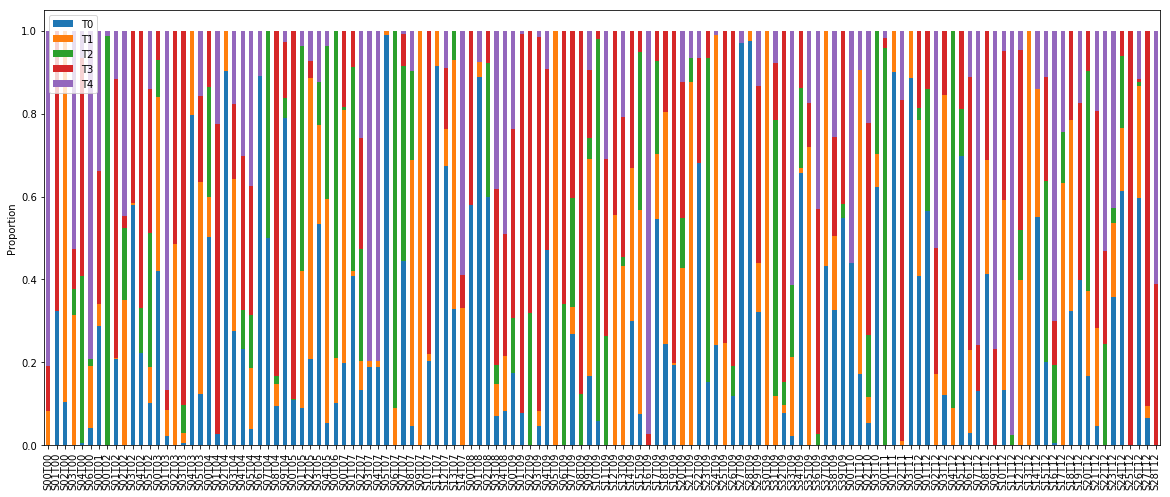

In [22]:
# Creating the stacked bar chart using plotting capabilities of pandas

import pandas as pd
sessKeys = tuple(sessAbstractsLemmaDict.keys())
df = pd.DataFrame(docTopic, index = sessKeys, columns = ('T0','T1','T2','T3','T4'))
#df = pd.DataFrame(docTopic, columns = ('T0','T1','T2','T3','T4'))
ax = df.plot(kind='bar', stacked=True, figsize=(20, 8))
ax.set_ylabel('Proportion')
#plt.savefig('stacked.png')
plt.show()

In this bar chart the order on the X-axis is the session order in the conference program, running from 'S00T00' to 'S28T12'. Within a given bar, the colored segments indicate the individual topics (shown in the legend on the right) and the length of those segments indicate the normalized weights. So, for instance, the first bar indicates that for session 'S00T00', the dominant topic is 'T4' with a weight of ~.9. Similarly, the next bar shows that for session 'S01T00' the dominant topic is 'T3' with a weight of ~.7. Skipping a bar and going to the bar for session 'S03T00', we can see that the combined segments and weights for topics 'T4' (red) and 'T1' (orange) are needed to cover a substantial proportion of the total (i.e. ~.85 = .52 + .31). As you move from left to right, with a little diligence you can see that most of the time 1 or 2 segments will cover at least .7 or 70% of the bar. This fact is more easily demonstrated by clustering or ordering bars by the topics that dominate the session.  This is the analysis that follows.

First, for each session the topics and their associated weights are ranked.

In [23]:
# Ranking Topics and associated Weights for each Session Abstract

topicNames = ['T0','T1','T2','T3','T4']
topicsDict = {}

for i in range(len(docTopic)):
    key = sessKeys[i]
    topicsDict[key] = {}
    topicsDict[key]['topicWghts'] = docTopic[i,:]
    topicsDict[key]['top5Topics'] = np.argsort(docTopic[i,:])[::-1][0:5]

    
print('Example of Topic and Weight Rankings for first 10 sessions:')
print('')
for sessKey in sessKeys[0:10]:
    print (sessKey, topicsDict[sessKey]['top5Topics'], np.sort(-topicsDict[sessKey]['topicWghts']))

Example of Topic and Weight Rankings for first 10 sessions:

S00T00 [4 3 1 2 0] [-0.80959 -0.10915 -0.08126 -0.      -0.     ]
S01T00 [3 0 4 2 1] [-0.67719 -0.32281 -0.      -0.      -0.     ]
S02T00 [1 0 4 3 2] [-0.89726 -0.10274 -0.      -0.      -0.     ]
S03T00 [4 1 3 2 0] [-0.5256  -0.31403 -0.09709 -0.06328 -0.     ]
S04T00 [3 2 4 0 1] [-0.52743 -0.40161 -0.06518 -0.00578 -0.     ]
S06T00 [4 1 0 2 3] [-0.79169 -0.14848 -0.0422  -0.01764 -0.     ]
S00T01 [4 3 0 1 2] [-0.33821 -0.32173 -0.28692 -0.05314 -0.     ]
S00T02 [2 4 3 1 0] [-0.98656 -0.01344 -0.      -0.      -0.     ]
S01T02 [3 0 4 1 2] [-0.67215 -0.20882 -0.11688 -0.00215 -0.     ]
S02T02 [4 1 2 3 0] [-0.44613 -0.35047 -0.17251 -0.03089 -0.     ]


Next, for each session we determine how many are needed for the summed weights to exceed .7 (or 70% of the total).

In [24]:
# for each document how many topics are needed to attain a weight sum > .7    
keyCntPrnt = {}
wghtLimit = .7
for i in range(0,len(sessKeys)):
    key = sessKeys[i]
    top5 = topicsDict[key]['top5Topics']
    topWs = topicsDict[key]['topicWghts']
    sumWght = 0.0
    tCnt = 0
    while sumWght < wghtLimit:
        tPtr = top5[tCnt]
        tWght = topWs[tPtr]
        sumWght = sumWght + tWght
        tCnt += 1
    keyCntPrnt[key] = tCnt
    
print('Sample of number of topics needed for a weighted sum > .7 for each of the first 10 sessions:')
print('')
for key, val in list(keyCntPrnt.items())[0:10]: print(key, val)

keyCnts = [0,0,0,0,0]
for key, val in list(keyCntPrnt.items())[0:]: keyCnts[val] += 1

print('')
print('Number of Sessions covered (weight sum > .7) by 1-4 topic weights:')
print(keyCnts[1:])

Sample of number of topics needed for a weighted sum > .7 for each of the first 10 sessions:

S00T00 1
S01T00 2
S02T00 1
S03T00 2
S04T00 2
S06T00 1
S00T01 3
S00T02 1
S01T02 2
S02T02 2

Number of Sessions covered (weight sum > .7) by 1-4 topic weights:
[52, 68, 12, 0]


The sample listing indicates that for the 9 of the first 10 topics either 1 or 2 topic weights are needed to exceed the .7 threshold. If you consider all sessions, the totals indicate that 53 sessions need 1 topic weight and 67 need 2 topic weights. That's the vast majority of the sessions.

Which topic weights are needed for each session is determined by the code below. The end result of this code is a list of the sessions ordered by the single topic or pair of topics whose sum of weights > .7.

In [25]:
#topicsDict
clusterKeys = {}

for i in range(0,5):
    topic = "T" + str(i)
    clusterKeys[topic] = []
    for j in range(0,5):
        if i != j:
            topic = "T" + str(i) + '-T' + str(j)
            clusterKeys[topic] = []
            
for key in sessKeys:
    if keyCntPrnt[key] == 1:
        topicInt = str(topicsDict[key]['top5Topics'][0])
        topic = 'T' + str(topicInt)
        #print(key, topic)
        clusterKeys[topic] = clusterKeys[topic] + [key]
    else:
        topicInt = str(topicsDict[key]['top5Topics'][0])
        topic = 'T' + str(topicInt)
        topicInt = str(topicsDict[key]['top5Topics'][1])
        topic = topic + '-T' + str(topicInt)
        #print(key, topic)
        clusterKeys[topic] = clusterKeys[topic] + [key]

print('Sessions by Topics whose combined weights > .7:')
print('')
for key, val in clusterKeys.items():
    key1 = key
    print(key,val)
    print('')

Sessions by Topics whose combined weights > .7:

T0 ['S04T03', 'S02T04', 'S06T04', 'S09T04', 'S05T07', 'S11T07', 'S01T08', 'S27T09', 'S28T09', 'S01T11', 'S03T11']

T0-T1 ['S03T05', 'S00T12', 'S14T12', 'S26T12']

T0-T2 ['S00T04', 'S07T04', 'S02T08', 'S17T09', 'S34T09', 'S03T10', 'S01T12', 'S24T12']

T0-T3 ['S03T02', 'S12T07', 'S00T08', 'S04T09', 'S22T09', 'S39T09', 'S05T12', 'S08T12']

T0-T4 ['S38T09']

T1 ['S02T00', 'S09T07', 'S05T09', 'S21T09', 'S24T09', 'S30T09', 'S35T09', 'S01T10', 'S03T12', 'S13T12']

T1-T0 ['S00T03', 'S03T04', 'S02T05', 'S00T07', 'S13T07', 'S09T09', 'S18T09', 'S37T09', 'S18T12']

T1-T2 ['S04T05', 'S08T07', 'S15T09']

T1-T3 ['S05T03', 'S12T09', 'S13T09', 'S14T09', 'S20T09', 'S10T12']

T1-T4 ['S17T12']

T2 ['S00T02', 'S00T06', 'S06T07', 'S10T09', 'S23T09', 'S00T11', 'S04T12']

T2-T0 ['S01T07', 'S07T07']

T2-T1 ['S01T05', 'S20T12']

T2-T3 ['S02T07', 'S31T09', 'S15T12']

T2-T4 []

T3 ['S03T03', 'S01T04', 'S08T04', 'S00T05', 'S10T07', 'S01T09', 'S03T09', 'S08T09', 'S19

The interpretation of these groupings is pretty straightforward. For instance, the first list, designated 'T0,' contains those sessions where the topic weight for topic 'T0' exceeds .7. The second line, labeled 'T0-T1' lists those sessions where the combined topic weights for topics 'T0' and 'T1' exceed .7. In this latter case, the fact that topic 'T0' is first indicates that its weight is larger. In contrast, the list for topics 'T1-T0' contains those sessions where the combined weight of the two topics > .7 but topic 'T1' has a larger weight than topic 'T0'.

Taken as a group, what these listings provide are clusters of sessions whose abstracts share common lemmas or contents. To get a visual image of these clusters, we can again rely on a stacked bar chart. Here, not only does each bar indicate the relative value of the topics for each session, but by displaying each cluster of sessions together we get a visual sense of the commonality of weights (and thus content) within each cluster and the differences in weights across the clusters.

The process of constructing the stacked bar chart is the same as before. The only thing that changes is the ordering of the sessions according to the above lists, i.e. the sessions appear in the order in which they are listed from the top list to the botton. 

In [26]:
# Re-ordering the data in the docTopicsNMF matrix so that the rows correspond to the topic listings

indexList = []
for topic, values in clusterKeys.items():
    for value in values:
        indexList = indexList + [value]

sessKeysDict = {}
sessCnt = 0
for sessKey in sessKeys:
    sessKeysDict[sessKey] = sessCnt
    sessCnt += 1

docTopicsNMF = np.zeros((132,5))
sCnt = 0
for sKey in indexList:
    iLoc = sessKeysDict[sKey]
    docTopicsNMF[sCnt,:] = docTopic[iLoc,:]
    sCnt += 1

Text(0,0.5,'Proportion')

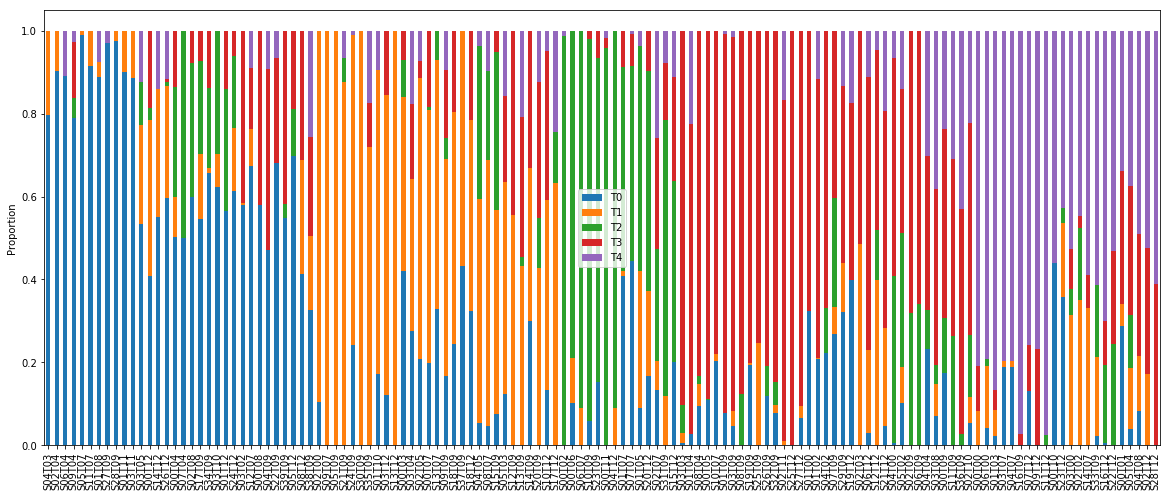

In [27]:
# Creating the stacked bar chart using plotting capabilities of pandas

indxTup = tuple(indexList)
df = pd.DataFrame(docTopicsNMF, index = indxTup, columns = ('T0','T1','T2','T3','T4'))
ax = df.plot(kind='bar', stacked=True, figsize=(20, 8))
ax.set_ylabel('Proportion')
#plt.savefig('stacked.png')
plt.show()

<a class="anchor" id="summary results"></a>
<h4>Summary Results of Topic Analysis: Top 10 Lemmas and Session Titles by Topics</h4>
* [Return to TOC](#toc)

Given that a number of session abstracts require 2 topic weights to cover their full range of lemmas, it may be the case that the number of topics needs to be increased from 5 to some other number of components (e.g. 10). However, a printout of the session titles covered by the 5 main topics, indicates that they do a pretty good job of clustering sessions that share common content.

In [28]:
for key, val in top10LemmasPerTopic.items():
    print(key, val)

T0 ['application', 'technology', 'industrial', 'industry', 'smart', 'market', 'potential', 'optical', 'current', 'gas']
T1 ['iot', 'company', 'look', 'network', 'connectivity', 'market', 'ecosystem', 'device', 'combine', 'growth']
T2 ['power', 'battery', 'energy', 'device', 'solar', 'source', 'run', 'wireless', 'flexible', 'maintenance']
T3 ['system', 'make', 'technique', 'lidar', 'decision', 'development', 'learn', 'autonomous', 'ai', 'intelligent']
T4 ['data', 'communication', 'analytics', 'standard', 'wireless', 'generate', 'learn', 'technology', 'industrial', 'edge']


In [29]:
import json
with open('progDict.json') as f:
   progDict = json.loads(f.read())

sessTitleDict = {}
for trkID in list(progDict.keys()):
    for sessID in list(progDict[trkID]['sessions'].keys()):
        sessTitleDict[sessID] = progDict[trkID]['sessions'][sessID]['sessTitle']
        #print(trkID, sessID, sessTitleDict[sessID])
        
topicTitle = {}
topicTitle = {'T0': 'Industrial Applications', 'T1':'Iot Connectivity', 'T2':'Power Devices', 'T3':'Intelligent Systems', 'T4':'Data Analytics'}
topicPrintFlag = [0,0,0,0,0]

print('Summary Results of Topic Analysis: Top 10 Lemmas and Session Titles by Topics')

for key, values in clusterKeys.items():
    topic = key[0:2]
    topicNum = int(key[1])
    topTitle = topicTitle[topic]
    if topicPrintFlag[topicNum] == 0:
        print('')
        topicPrintFlag[topicNum] = 1
        top10Lemmas =  top10LemmasPerTopic[topic]
        print(topic, topTitle)
        print('')
        print('  ','Top 10 Lemmas:')
        print('  ',top10Lemmas)
        print('')
        print('  ','Sessions:')
    for val in values:
        if val in list(sessTitleDict.keys()):
            sessTitle = sessTitleDict[val]
            if len(sessTitle) > 100:
                sessTitle = sessTitle[0:99] + '...'
            print('  ', val,sessTitle)


Summary Results of Topic Analysis: Top 10 Lemmas and Session Titles by Topics

T0 Industrial Applications

   Top 10 Lemmas:
   ['application', 'technology', 'industrial', 'industry', 'smart', 'market', 'potential', 'optical', 'current', 'gas']

   Sessions:
   S04T03 EM4 - Forget Silver Bullets - Secure IIoT Applications Need Secure Application Code
   S02T04 MA2 - Location Awareness for Industrial IoT
   S06T04 MD1 - Process Sensor Needs in the Petrochemical Industry - Challenges and Drivers
   S09T04 MD4 - Next Generation Intelligent Gas Sensors
   S05T07 Ho Chi Minh City, Vietnam - An Open Sky for MEMS Eagles
   S11T07 FW2 - Sensor Bundle Works with IoT for Safer Sports
   S01T08 MEMS2 - Emerging MEMS & Sensor Technologies to Watch
   S27T09 Thermal Sensor Technologies, Applications for Sensing and Imaging
   S28T09 POF-Based Position Sensor Establishes New Industry Benchmark in Size, Performance and Cost
   S01T11 O2 - 3D Vision with Time-of-Flight for Reliable Object Detection an

<a class="anchor" id="concluding remarks"></a>
<h4>Concluding Remarks</h4>
* [Return to TOC](#toc)

In the introduction, three interrelated questions were raised:

<ol>
    <li>Is there a relatively short list of topics that capture the essense of conference content?</li>
    <li>If there is a shortlist, are there differences among the sessions with respect to these topics?</li>
    <li>Similarly, are there differences among the tracks with respect to these topics?</li>
</ol>

For the most the answers are yes. The main caveat is that while this analysis could certainly be refined in a number of ways the fact of the matter is that conference programs are not well-oiled machines when it comes to establishing boundaries between tracks and sessions. In many conferences the hot topics -- like IoT and IIoT, AI, and machine learning -- tend to spill across these boundaries. If a conference has an interest increasing uniformity within their tracks and sessions, topic modeling could provide one way of doing so. On the other hand, if uniformity is not a goal, then other forms of machine learning and analysis could assist in making recommendations to attendees (but that's a subject for another notebook).

<a class="anchor" id="next step"></a>
<h4>Next Step</h4>
* [Return to TOC](#toc)

Beside clustering and topic modeling, there are additional ways to understand and summarize the overall conference content. One of these, network analysis, is explored in the next notebook.